In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('inspection2023_Ver2.csv')
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,pop_sqkm,num_crime_in2021,Hispanic or Latino,white,Black or African American,American Indian,Asian,Hawaiian,other,new_cuisine
0,50088158,XIANG HOTPOT,Brooklyn,5816,FORT HAMILTON PARKWAY,11219,7188515888,Chinese,2023-02-13,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Chinese
1,50131276,WHATSUP CAFE,Brooklyn,6609,FORT HAMILTON PARKWAY,11219,7187907666,Asian/Asian Fusion,2023-03-23,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Asian
2,50052708,PARC OASIS,Brooklyn,6403,11 AVENUE,11219,9292922010,Seafood,2023-02-23,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Meat
3,41028194,SAI'S CAFE,Brooklyn,6003,FORT HAMILTON PARKWAY,11219,6463611524,Bakery Products/Desserts,2023-02-28,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Bakery/Dessert
4,50049290,ORCHIDEA RESTAURANT,Brooklyn,4815,12 AVENUE,11219,7186867500,Jewish/Kosher,2023-02-06,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Jewish


In [ ]:
data.shape

(9259, 45)

In [ ]:
data.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1', 'cuisine', 'num_foodDO', 'median income',
       'pop_over25', 'bachelor_higher', 'prop_bachelor', 'POPULATION',
       'area_sqkm', 'pop_sqkm', 'num_crime_in2021', 'Hispanic or Latino',
       'white', 'Black or African American', 'American Indian', 'Asian',
       'Hawaiian', 'other', 'new_cuisine'],
      dtype='object')

In [ ]:
features = ['num_foodDO','median income','prop_bachelor','pop_sqkm','num_crime_in2021','Hispanic or Latino','white', 'Black or African American', 'American Indian', 'Asian','Hawaiian', 'other', 'new_cuisine']
X = data.loc[:,features]
Y = data['GRADE']

X = pd.get_dummies(X, columns=['new_cuisine'])

print(X.shape)
print(Y.shape)

(9259, 70)
(9259,)


In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler

cont_features = X.loc[:,'num_foodDO':'other']
dummies = X.loc[:,'new_cuisine_Afghan':]
cols = cont_features.columns

scaler = StandardScaler()
stand = scaler.fit_transform(cont_features)
stand_features = pd.DataFrame(stand, columns=cols)

X_standard = pd.concat([stand_features,dummies], axis=1)

In [ ]:
X_standard.shape

(9259, 70)

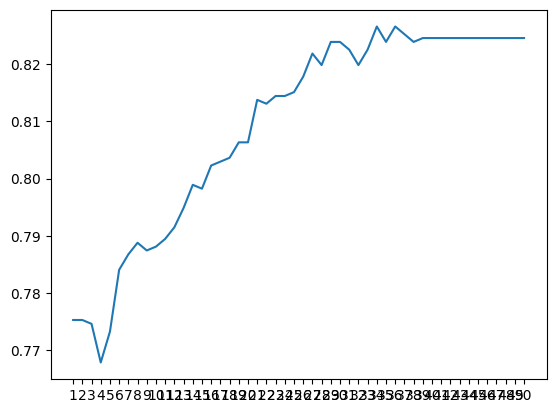

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

X_tv,X_test,Y_tv,Y_test = train_test_split(X_standard, Y, test_size = 0.2, random_state=234)
X_train,X_valid,Y_train,Y_valid = train_test_split(X_tv, Y_tv, test_size = 0.2, random_state=234)

OS_acc = []

for d in range(1,51):
  dt = DecisionTreeClassifier(max_depth=d,random_state = 888)
  dt.fit(X_train,Y_train)
  pred = dt.predict(X_valid)
  OS_acc.append(accuracy_score(Y_valid,pred))
plt.plot(OS_acc)
plt.xticks(np.arange(len(OS_acc)), np.arange(1,51))
plt.show()



In [ ]:
range(1,51)[np.array(OS_acc).argmax()]

34

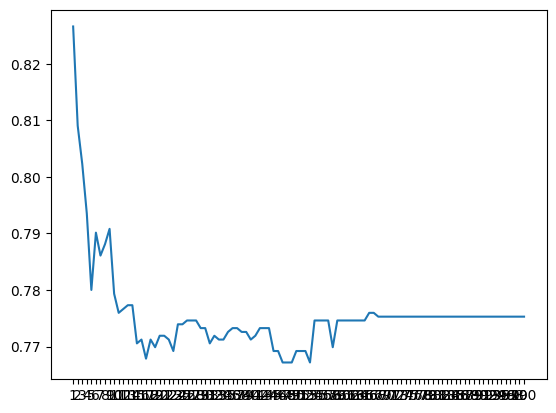

In [ ]:
#d = 34
OS_acc2 = []

for l in range(1,101):
  dt = DecisionTreeClassifier(max_depth=34,min_samples_leaf=l,random_state = 888)
  dt.fit(X_train,Y_train)
  pred = dt.predict(X_valid)
  OS_acc2.append(accuracy_score(Y_valid,pred))
plt.plot(OS_acc2)
plt.xticks(np.arange(len(OS_acc2)), np.arange(1,101))
plt.show()

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=34,min_samples_leaf=1)
dt1.fit(X_train,Y_train)
print('in-sample accuracy: {}'.format(dt1.score(X_train,Y_train)))
pred = dt1.predict(X_test)
print('out-of-sample accuracy: {}'.format(accuracy_score(Y_test,pred)))


in-sample accuracy: 0.8698734177215189
out-of-sample accuracy: 0.82829373650108


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           A       0.86      0.94      0.90      1439
           B       0.68      0.42      0.52       292
           C       0.55      0.47      0.51       121

    accuracy                           0.83      1852
   macro avg       0.70      0.61      0.64      1852
weighted avg       0.81      0.83      0.81      1852



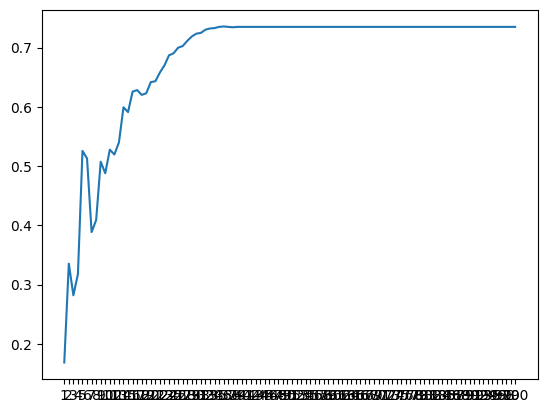

In [ ]:
#resample X_train,Y_train

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)

OS_acc3 = []

for d in range(1,101):
  dt = DecisionTreeClassifier(max_depth=d,random_state = 888)
  dt.fit(X_res,Y_res)
  pred = dt.predict(X_valid)
  OS_acc3.append(accuracy_score(Y_valid,pred))
plt.plot(OS_acc3)
plt.xticks(np.arange(len(OS_acc3)), np.arange(1,101))
plt.show()

In [ ]:
range(1,101)[np.array(OS_acc3).argmax()]

36

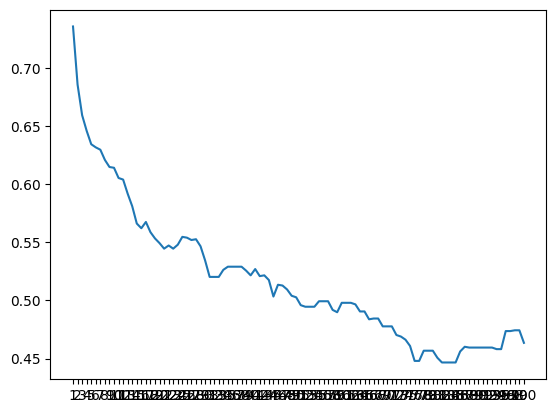

In [ ]:
#d = 36
OS_acc4 = []

for l in range(1,101):
  dt = DecisionTreeClassifier(max_depth=36,min_samples_leaf=l,random_state = 888)
  dt.fit(X_res,Y_res)
  pred = dt.predict(X_valid)
  OS_acc4.append(accuracy_score(Y_valid,pred))
plt.plot(OS_acc4)
plt.xticks(np.arange(len(OS_acc4)), np.arange(1,101))
plt.show()

In [ ]:
range(1,101)[np.array(OS_acc4).argmax()]

1

In [ ]:
dt2 = DecisionTreeClassifier(max_depth=36,min_samples_leaf=1)
dt2.fit(X_res,Y_res)
print('in-sample accuracy: {}'.format(dt2.score(X_res,Y_res)))
pred = dt2.predict(X_test)
print('out-of-sample accuracy: {}'.format(accuracy_score(Y_test,pred)))


in-sample accuracy: 0.8724412842059901
out-of-sample accuracy: 0.7462203023758099


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           A       0.92      0.76      0.83      1439
           B       0.47      0.62      0.54       292
           C       0.38      0.91      0.54       121

    accuracy                           0.75      1852
   macro avg       0.59      0.76      0.64      1852
weighted avg       0.82      0.75      0.77      1852



Text(0, 0.5, 'Feature Importance')

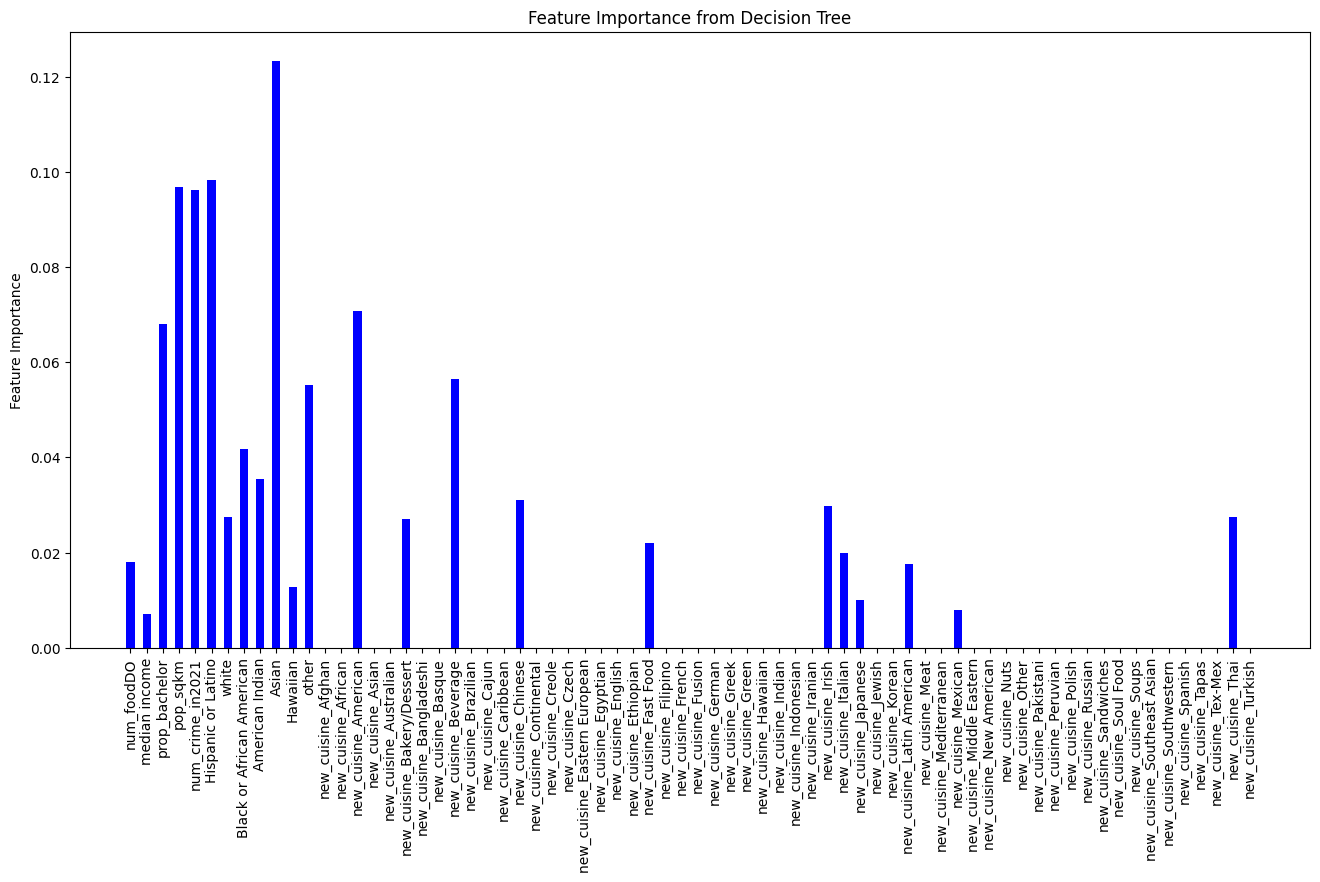

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))

ax.bar(np.arange(70), dt.feature_importances_, width = 0.5, color = 'b')
ax.set_xticks(np.arange(len(dt.feature_importances_)))
ax.set_xticklabels(X_res.columns.values, rotation = 90)
plt.title('Feature Importance from Decision Tree')
ax.set_ylabel('Feature Importance')

In [ ]:
Feature_importance=pd.DataFrame([list(X_res.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["features","importance"]

# list the top 15 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:15,:]

,features,importance
9,Asian,0.12324
5,Hispanic or Latino,0.098206
3,pop_sqkm,0.096883
4,num_crime_in2021,0.096138
14,new_cuisine_American,0.07071
2,prop_bachelor,0.067944
20,new_cuisine_Beverage,0.056357
11,other,0.05516
7,Black or African American,0.041672
8,American Indian,0.035476


Text(0, 0.5, 'Feature Importance')

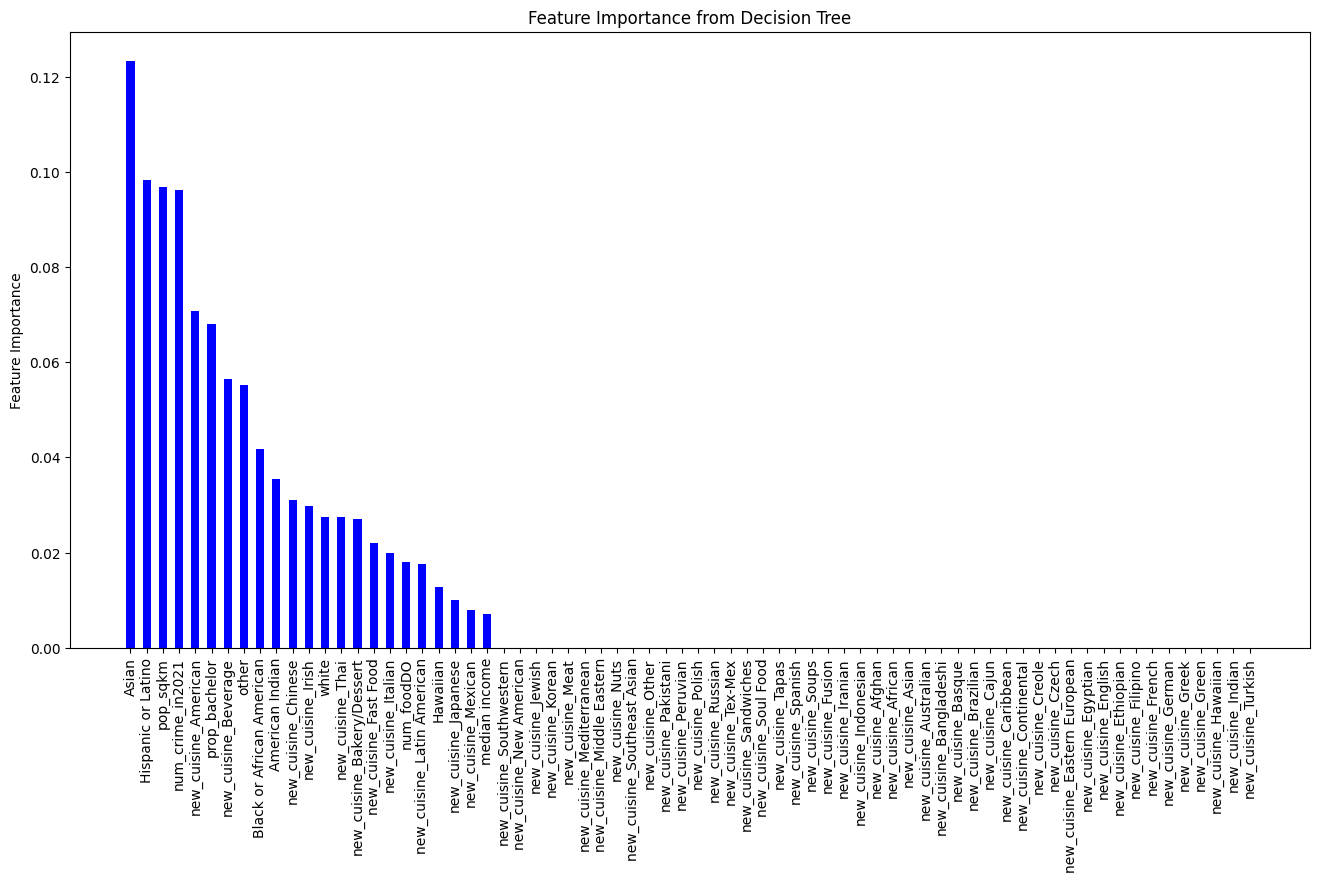

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))

ax.bar(np.arange(70), Feature_importance['importance'].sort_values(ascending=False), width = 0.5, color = 'b')
ax.set_xticks(np.arange(len(Feature_importance)))
ax.set_xticklabels(Feature_importance.sort_values(by='importance',ascending=False)['features'], rotation = 90)
plt.title('Feature Importance from Decision Tree')
ax.set_ylabel('Feature Importance')

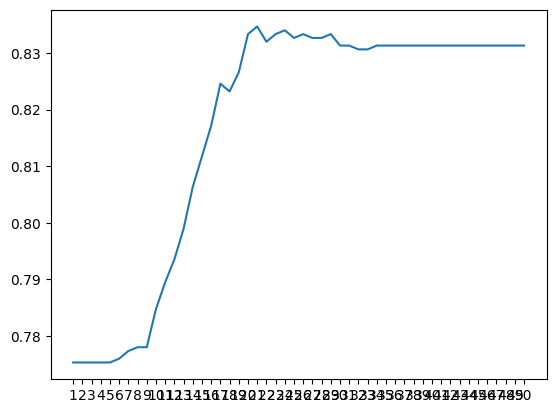

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_tv,X_test,Y_tv,Y_test = train_test_split(X_standard, Y, test_size = 0.2, random_state=234)
X_train,X_valid,Y_train,Y_valid = train_test_split(X_tv, Y_tv, test_size = 0.2, random_state=234)

rf_OS = []

for d in range(1,51):
  rf = RandomForestClassifier(max_depth=d,random_state = 888,n_jobs=-1)
  rf.fit(X_train,Y_train)
  pred = rf.predict(X_valid)
  rf_OS.append(accuracy_score(Y_valid,pred))
plt.plot(rf_OS)
plt.xticks(np.arange(len(rf_OS)), np.arange(1,51))
plt.show()

In [ ]:
range(1,51)[np.array(rf_OS).argmax()]

21

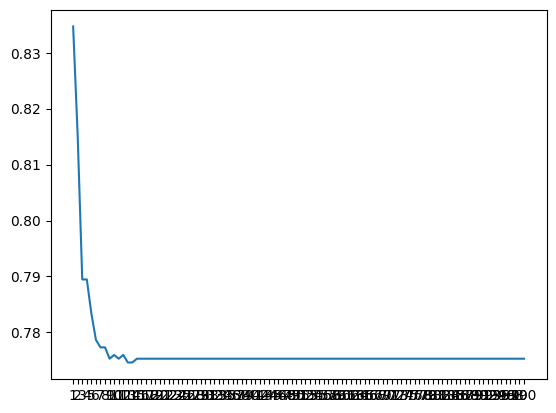

In [ ]:
rf_OS2 = []

for l in range(1,101):
  rf = RandomForestClassifier(max_depth=21,min_samples_leaf=l,random_state = 888,n_jobs=-1)
  rf.fit(X_train,Y_train)
  pred = rf.predict(X_valid)
  rf_OS2.append(accuracy_score(Y_valid,pred))
plt.plot(rf_OS2)
plt.xticks(np.arange(len(rf_OS2)), np.arange(1,101))
plt.show()

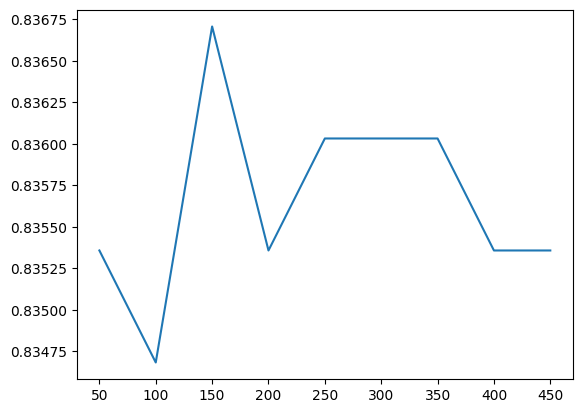

In [ ]:
rf_OS3 = []

for n in range(50,500,50):
  rf = RandomForestClassifier(n_estimators = n, max_depth=21,min_samples_leaf=1,random_state = 888,n_jobs=-1)
  rf.fit(X_train,Y_train)
  pred = rf.predict(X_valid)
  rf_OS3.append(accuracy_score(Y_valid,pred))
plt.plot(rf_OS3)
plt.xticks(np.arange(len(rf_OS3)), np.arange(50,500,50))
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_estimators = 150, max_depth=21,min_samples_leaf=1,random_state = 888,n_jobs=-1)
rfc.fit(X_train,Y_train)
print('in-sample accuracy: {}'.format(rfc.score(X_train,Y_train)))
pred = rfc.predict(X_test)
print('out-of-sample accuracy: {}'.format(accuracy_score(Y_test,pred)))

in-sample accuracy: 0.8658227848101265
out-of-sample accuracy: 0.8336933045356372


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           A       0.85      0.96      0.91      1439
           B       0.75      0.37      0.49       292
           C       0.59      0.43      0.50       121

    accuracy                           0.83      1852
   macro avg       0.73      0.59      0.63      1852
weighted avg       0.82      0.83      0.81      1852



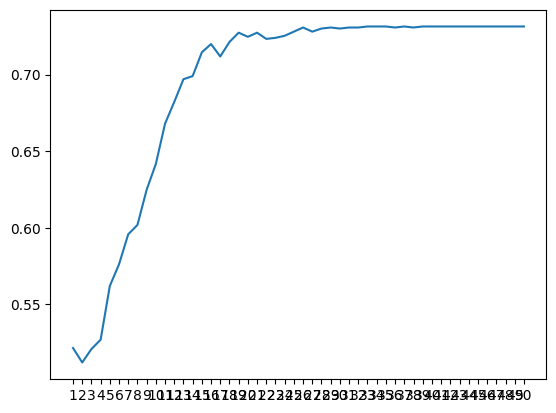

In [ ]:
#resample X_train,Y_train

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)

rf_OS4 = []

for d in range(1,51):
  rf = RandomForestClassifier(max_depth=d,random_state = 888,n_jobs=-1)
  rf.fit(X_res, Y_res)
  pred = rf.predict(X_valid)
  rf_OS4.append(accuracy_score(Y_valid,pred))
plt.plot(rf_OS4)
plt.xticks(np.arange(len(rf_OS4)), np.arange(1,51))
plt.show()

In [ ]:
range(1,51)[np.array(rf_OS4).argmax()]

33

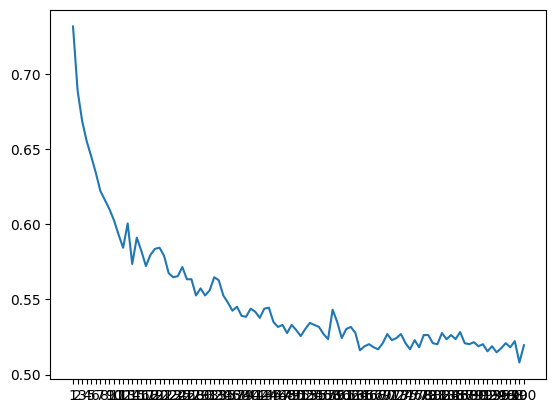

In [ ]:
rf_OS5 = []

for l in range(1,101):
  rf = RandomForestClassifier(max_depth=33,min_samples_leaf=l,random_state = 888,n_jobs=-1)
  rf.fit(X_res, Y_res)
  pred = rf.predict(X_valid)
  rf_OS5.append(accuracy_score(Y_valid,pred))
plt.plot(rf_OS5)
plt.xticks(np.arange(len(rf_OS5)), np.arange(1,101))
plt.show()

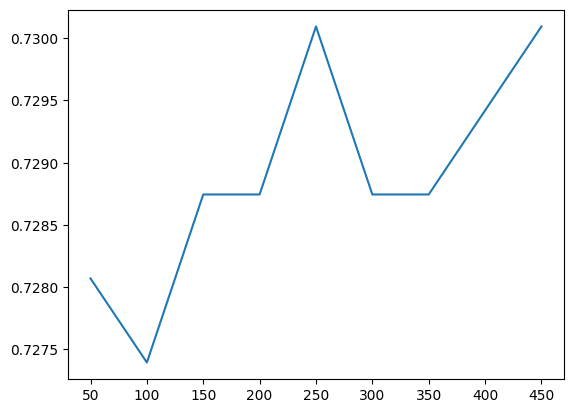

In [ ]:
rf_OS6 = []

for n in range(50,500,50):
  rf = RandomForestClassifier(n_estimators = n, max_depth=21,min_samples_leaf=1,random_state = 888,n_jobs=-1)
  rf.fit(X_res,Y_res)
  pred = rf.predict(X_valid)
  rf_OS6.append(accuracy_score(Y_valid,pred))
plt.plot(rf_OS6)
plt.xticks(np.arange(len(rf_OS6)), np.arange(50,500,50))
plt.show()

In [ ]:
range(50,500,50)[np.array(rf_OS6).argmax()]

250

In [ ]:
rfc2 = RandomForestClassifier(n_estimators = 250, max_depth=21,min_samples_leaf=1,random_state = 888,n_jobs=-1)
rfc2.fit(X_res,Y_res)
print('in-sample accuracy: {}'.format(rfc2.score(X_res,Y_res)))
pred2 = rfc2.predict(X_test)
print('out-of-sample accuracy: {}'.format(accuracy_score(Y_test,pred2)))

in-sample accuracy: 0.8684191625368096
out-of-sample accuracy: 0.7424406047516199


In [ ]:
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

           A       0.92      0.75      0.83      1439
           B       0.47      0.63      0.54       292
           C       0.38      0.93      0.54       121

    accuracy                           0.74      1852
   macro avg       0.59      0.77      0.64      1852
weighted avg       0.82      0.74      0.76      1852



Text(0, 0.5, 'Feature Importance')

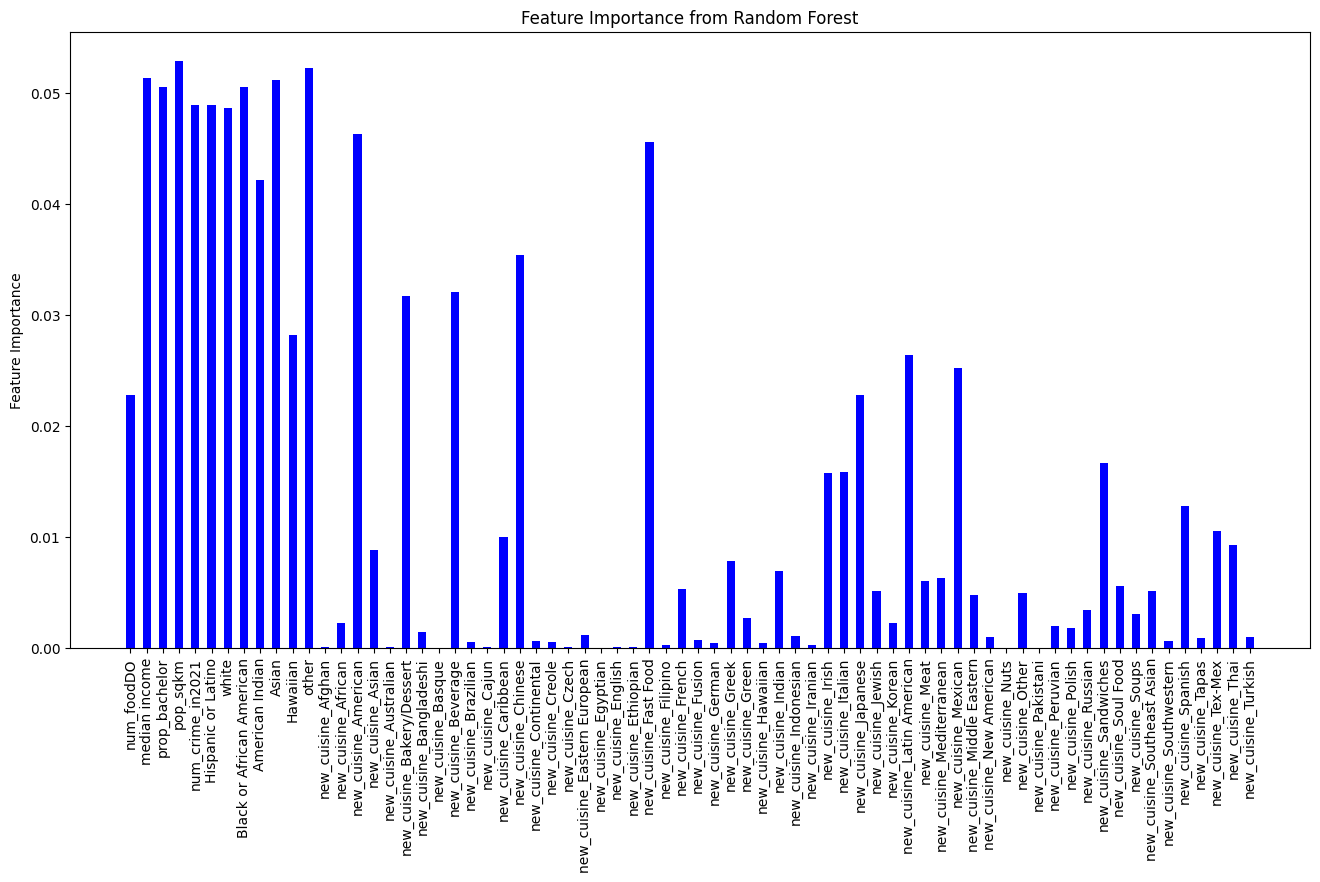

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))

ax.bar(np.arange(70), rfc2.feature_importances_, width = 0.5, color = 'b')
ax.set_xticks(np.arange(len(rfc2.feature_importances_)))
ax.set_xticklabels(X_res.columns.values, rotation = 90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Feature Importance')

In [ ]:
Feature_importance2=pd.DataFrame([list(X_res.columns),list(rfc2.feature_importances_)]).T
Feature_importance2.columns=["features","importance"]

# list the top 15 most important features in order
Feature_importance2.sort_values(by="importance",ascending=False).iloc[:15,:]

,features,importance
3,pop_sqkm,0.052899
11,other,0.052271
1,median income,0.051376
9,Asian,0.051159
7,Black or African American,0.050577
2,prop_bachelor,0.050538
4,num_crime_in2021,0.048984
5,Hispanic or Latino,0.048899
6,white,0.048632
14,new_cuisine_American,0.046337


Text(0, 0.5, 'Feature Importance')

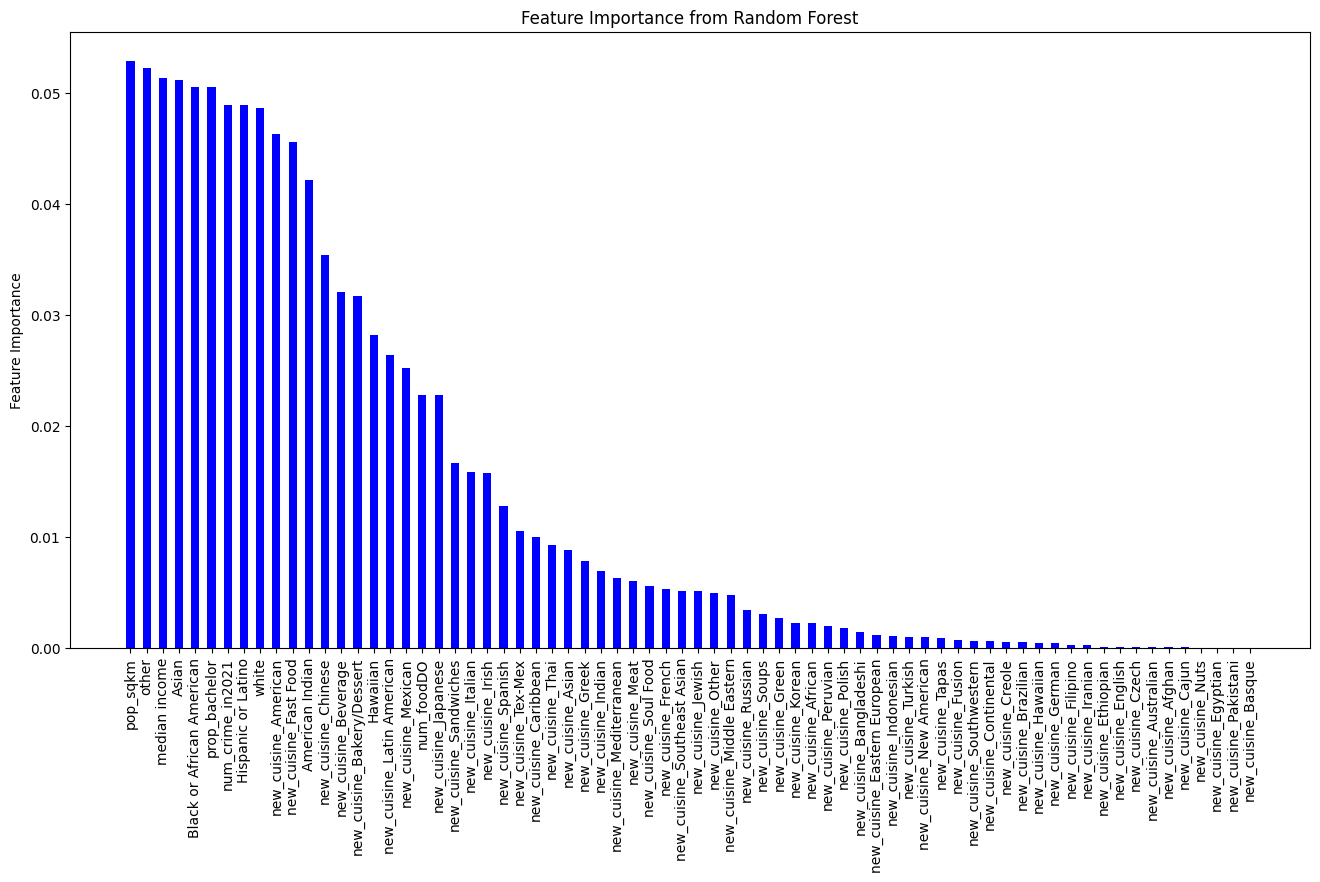

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))

ax.bar(np.arange(70), Feature_importance2['importance'].sort_values(ascending=False), width = 0.5, color = 'b')
ax.set_xticks(np.arange(len(Feature_importance2)))
ax.set_xticklabels(Feature_importance2.sort_values(by='importance',ascending=False)['features'], rotation = 90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Feature Importance')

Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,random_state=234)
gmm.fit(X_standard)
gm_pred = gmm.predict(X_standard)

In [ ]:
Y[:5]

0    A
1    A
2    A
3    C
4    B
Name: GRADE, dtype: object

In [ ]:
Y.value_counts()

A    7229
B    1300
C     730
Name: GRADE, dtype: int64

In [ ]:
Y_gm = Y.copy()

Y_gm = Y_gm.to_frame(name = 'Y')
Y_gm.head()

,Y
0,A
1,A
2,A
3,C
4,B


In [ ]:
Y_gm['pred'] = gm_pred
Y_gm.head()

,Y,pred
0,A,0
1,A,0
2,A,0
3,C,0
4,B,0


In [ ]:
Y_gm['pred'].value_counts()

0    7982
1    1211
2      66
Name: pred, dtype: int64

In [ ]:
Y_gm['Y'] = Y_gm['Y'].replace({'A':0,'B':1,'C':2})
Y_gm.head()

,Y,pred
0,0,0
1,0,0
2,0,0
3,2,0
4,1,0


In [ ]:
len(Y_gm.loc[Y_gm['Y'] == Y_gm['pred']])/len(Y_gm)

0.6919753753105087

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_gm['Y'],Y_gm['pred'], average='macro')

0.33543883579657713

In [ ]:
recall_score(Y_gm['Y'],Y_gm['pred'], average='macro')

0.331962053476312

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(Y_gm['Y'],Y_gm['pred'])

0.6919753753105087

In [ ]:
print(classification_report(Y_gm['Y'],Y_gm['pred']))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      7229
           1       0.13      0.12      0.13      1300
           2       0.09      0.01      0.02       730

    accuracy                           0.69      9259
   macro avg       0.34      0.33      0.32      9259
weighted avg       0.64      0.69      0.66      9259

